In [1]:
import tensorflow as tf
from tensorflow import keras 
import numpy as np 
from tensorflow.keras import layers 
from tensorflow.keras import Model

In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2022-01-19 12:47:01--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 108.177.97.128, 108.177.125.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M  27.0MB/s    in 3.1s    

2022-01-19 12:47:05 (27.0 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [3]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

pre_trained_model = InceptionV3(input_shape=(299,299,3),
                                include_top=False, 
                                weights=None)

local_weights = "/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"
pre_trained_model.load_weights(local_weights)

In [4]:
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                      

In [8]:
from tensorflow.keras.optimizers import RMSprop
last_layer = pre_trained_model.get_layer("mixed7")

print(last_layer.output_shape)
last_output = last_layer.output
 


x = layers.Flatten()(last_output)

x = layers.Dense(1024, activation="relu")(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(1, activation="sigmoid")(x)

model = Model(pre_trained_model.input, x)

model.compile(loss="binary_crossentropy",
              optimizer = RMSprop(learning_rate=0.0001),
              metrics=["accuracy"])

(None, 17, 17, 768)


In [9]:
import zipfile 
import os
unzip = zipfile.ZipFile("./For Project.zip","r")
unzip.extractall("Files/")
unzip.close()




In [10]:
base_dir = "Files/For Project"
train_dir = os.path.join(base_dir, "Training")
validation_dir = os.path.join(base_dir, "Validation")


In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

training_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True
                                      )
training_generator = training_datagen.flow_from_directory(
    train_dir,
    target_size = (299,299),
    batch_size = 20, 
    class_mode="binary"
    
)

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size = (299,299),
    batch_size = 20, 
    class_mode="binary"
    
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [12]:
history = model.fit(
    training_generator,
    steps_per_epoch = 100, 
    epochs = 9, 
    validation_data = validation_generator,
    validation_steps = 50,
    verbose=2
)

Epoch 1/9
100/100 - 2035s - loss: 0.3723 - accuracy: 0.9285 - val_loss: 1.1037 - val_accuracy: 0.6830 - 2035s/epoch - 20s/step
Epoch 2/9
100/100 - 2050s - loss: 0.1516 - accuracy: 0.9510 - val_loss: 2.6769 - val_accuracy: 0.5620 - 2050s/epoch - 21s/step
Epoch 3/9
100/100 - 2035s - loss: 0.0939 - accuracy: 0.9660 - val_loss: 1.7163 - val_accuracy: 0.7250 - 2035s/epoch - 20s/step
Epoch 4/9
100/100 - 2016s - loss: 0.0953 - accuracy: 0.9665 - val_loss: 5.3493 - val_accuracy: 0.6340 - 2016s/epoch - 20s/step
Epoch 5/9
100/100 - 2035s - loss: 0.0781 - accuracy: 0.9750 - val_loss: 1.3451 - val_accuracy: 0.8000 - 2035s/epoch - 20s/step
Epoch 6/9
100/100 - 1985s - loss: 0.0751 - accuracy: 0.9765 - val_loss: 4.0456 - val_accuracy: 0.6010 - 1985s/epoch - 20s/step
Epoch 7/9
100/100 - 1994s - loss: 0.0587 - accuracy: 0.9790 - val_loss: 6.3487 - val_accuracy: 0.6660 - 1994s/epoch - 20s/step
Epoch 8/9
100/100 - 2017s - loss: 0.0625 - accuracy: 0.9810 - val_loss: 3.8855 - val_accuracy: 0.8020 - 2017s/e

<Figure size 432x288 with 0 Axes>

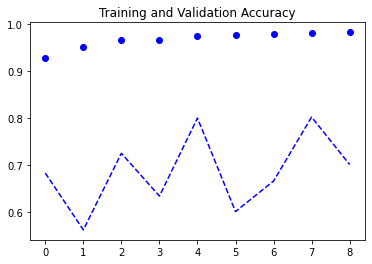

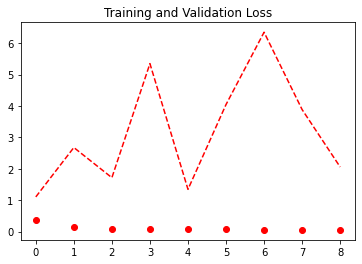

<Figure size 432x288 with 0 Axes>

In [13]:
import matplotlib.pyplot as plt

acc = history.history["accuracy"]
valid_acc = history.history["val_accuracy"]
loss = history.history["loss"]
valid_loss = history.history["val_loss"]

epochs = range(len(acc))

plt.plot(epochs, acc, "bo", label="Training Accuracy")
plt.plot(epochs, valid_acc, "--b", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.figure()

plt.plot(epochs, loss, "ro", label="Training Loss")
plt.plot(epochs, valid_loss, "--r", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.figure()


Saving Normal-1093.png to Normal-1093.png
[0.]
Normal-1093.png [[0.]]-You are safe


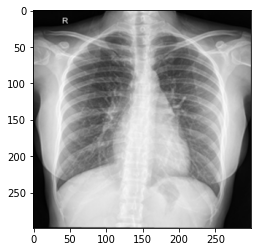

In [23]:
from google.colab import files 
from keras.preprocessing import image 

upload = files.upload()

for i in upload.keys():
  path = "/content/"+i
  img = image.load_img(path, target_size=(299,299))
  plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)

  print(classes[0])

  if classes[0] > 0.5:
    print(i+" "+classes+"-""-This report says you have Covid 19")
  else:
    print(i+" "+str(classes) +"-You are safe")